<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/EulerTaylorRungeOrdenConvergencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Euler**
- Problema de valores iniciales 
$$
x'(t)=f(t,x(t)),\qquad x(t_{0})=x_{0}
$$
- Método:
$$
x_{n+1}=x_{n}+hf(t_{n},x_{n}),
$$
donde $h$ es el paso y $t_n = t_0 + nh$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, t0, tn, x0, n):
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1]+h*f(t[i-1], x[i-1])
    return((t,x))


###*Ejemplo* 
Lo aplicamos en el intervalo $[0, 5]$ al problema 

$$x'(t) = 2x(t) - 5 \sin(t), \quad x(0) = 1$$

que tiene solución exacta $x(t) = 2 \sin(t) + \cos(t)$.


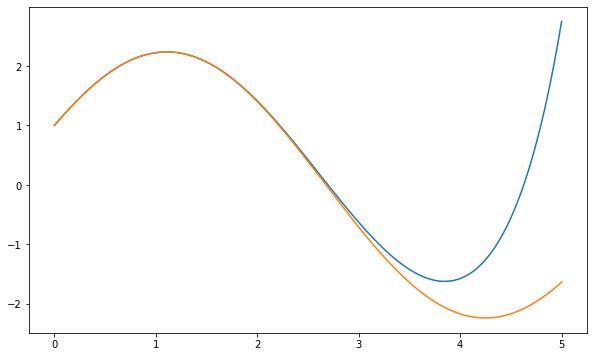

In [ ]:
def f(t, x):
    y = 2*x-5*np.sin(t)
    return(y)

def sol(t):
    return(2 * np.sin(t) + np.cos(t))

(t1, x1) = euler(f, 0, 5, 1, 10001)
plt.figure(figsize=(10,6))
plt.plot(t1, x1)
plt.plot(t1, sol(t1))

###Orden de Convergencia en Euler


*Ejemplo:* 

Para $h \in  [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]$, aplicar el método de Euler con paso $h$. Calcular $E_N = |x_N - x(5)|$. Graficar $\log(E_n)$ en función de $\log(h)$.

In [ ]:
h = [0.025, 0.01, 0.005, 0.0025, 0.001, 0.0005]
nh = len(h)
err = np.zeros(nh)
for i in range(nh):
    n = int(5/h[i])
    (t, x) = euler(f, 0, 5, 1, n)
    err[i] = abs(x[n]-sol(5))
    print(h[i], x[n], sol(5))

plt.figure(figsize=(10,6))
plt.plot(np.log(h), np.log(err), '.', ms=5)
plt.plot(np.log(h), np.log(err))


Importante: La pendiente de la recta obtenida nos da el orden de convergencia del método.
(Observar que para pasos grandes ya no da tan bien. Por eso estimamos el valor de la pendiente con los ùltimos pasos) 

In [ ]:
print("Pendiente: ", (np.log(err[nh-1]) - np.log(err[nh-2])) / (np.log(h[nh-1]) - np.log(h[nh-2])))

#**Taylor**


- Método:
$$
x_i = x_{i-1} + h f(t_{i-1}, x_{i-1}) + \frac{h^2}{2} (f_t(t_{i-1}, x_{i-1}) + f_x(t_{i-1}, x_{i-1}) f(t_{i-1}, x_{i-1}))
$$




In [ ]:
def taylor2(f, ft, fx, t0, tn, x0, n):
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1]+h*f(t[i-1], x[i-1])+h**2/2*(ft(t[i-1], x[i-1])+fx(t[i-1], x[i-1])*f(t[i-1], x[i-1]))
    return((t,x))


In [ ]:
def f(t, x):
    y = 2*x-5*np.sin(t)
    return(y)

def fx(t, x):
    y = 2
    return(y)

def ft(t, x):
    y = -5*np.cos(t)
    return(y)

(t2, x2) = taylor2(f, ft, fx, 0, 5, 1, 1001)
plt.figure(figsize=(10,6))
plt.plot(t2,x2)
plt.plot(t2,sol(t2))


###Orden de Convergencia en Taylor

In [ ]:
h = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
nh = len(h)
err = np.zeros(nh)
for i in range(nh):
    n = int(5/h[i])
    (t, x) = taylor2(f, ft, fx, 0, 5, 1, n)
    err[i] = abs(x[n]-sol(5))
    print(h[i], x[n], sol(5))


plt.figure(figsize=(10,6))
plt.plot(np.log(h), np.log(err), '.', ms=5)
plt.plot(np.log(h), np.log(err))

print("Pendiente: ", (np.log(err[nh-1]) - np.log(err[nh-2])) / (np.log(h[nh-1]) - np.log(h[nh-2])))

#**Euler Modificado**:

-Método:

$$
x_i = x_{i-1} + h f(t_{i-1} + h/2, x_{i-1} + h/2 f(t_{i-1}, x_{i-1}))
$$



In [ ]:
def eulerM(f, t0, tn, x0, n):
    t = np.linspace(t0,tn,n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1]+h*f(t[i-1] + h/2, x[i-1] + h/2 * f(t[i-1], x[i-1]))
    return((t,x))

(t3, x3) = eulerM(f, 0, 5, 1, 1001)
plt.figure(figsize=(10,6))
plt.plot(t3,x3)
plt.plot(t2,x2)
plt.plot(t3,sol(t3))

###Orden de Convergencia en Euler Modificado

In [ ]:
h = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
nh = len(h)
err = np.zeros(nh)
for i in range(nh):
    n = int(5/h[i])
    (t, x) = eulerM(f, 0, 5, 1, n)
    err[i] = abs(x[n]-sol(5))
    print(h[i], x[n], sol(5))

plt.figure(figsize=(10,6))
plt.plot(np.log(h), np.log(err), '.', ms=5)
plt.plot(np.log(h), np.log(err))

print("Pendiente: ", (np.log(err[nh-1]) - np.log(err[nh-2])) / (np.log(h[nh-1]) - np.log(h[nh-2])))

#**Euler Implícito**

- Método:

$$
x_{n+1} = x_n + h f(t_{n+1}, x_{n+1}),
$$ 



#*Ejemplo*

- Resolver la siguiente ecuación en el intervalo $[1, 3]$ por el método de Euler ímplicito:

$$
x'(t) = 4 \frac{x(t)}{t}, \quad x(1) = 1
$$

- Comparar con la solución exacta: $x(t) = t^4$.

Como $f(t, x) = 4 \frac{x}{t}$, reemplazamos:
$$
x_{n+1} = x_n + h \left( 4 \frac{x_{n+1}}{t_{n+1}} \right)
$$
Despejando $x_{n+1}$ y usando que  $t_{n+1} = t_n + h$ obtenemos:

$$
x_{n+1} = x_n  \frac{t_n + h}{t_n  - 3h}
$$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eulerI(t0, tn, x0, n):
    t = np.linspace(t0, tn, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1]*(t[i-1]+h)/(t[i-1]-3*h)
    return((t,x))

(t, x1) = eulerI(1, 10, 1, 400)
plt.figure(figsize=(10,6))
plt.plot(t, x1, label = 'euler implicito')
plt.plot(t,t**4, label = 'solucion exacta')
plt.legend(loc='upper left')
     
        

##Grafiquemos las curvas obtenidas con Euler explícito, implícito, y solución exacta.

In [ ]:
def euler(f, t0, tn, x0, n):
    t = np.linspace(t0, tn, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        x[i] = x[i-1] + h * f(t[i-1], x[i-1])
    return((t,x))

def f(t, x):
    return(4*x/t)

(t, x1) = euler(f, 1, 10, 1, 200)
(t, x2) = eulerI(1, 10, 1, 200)
plt.figure(figsize=(10,6))
plt.plot(t,x1, label = 'euler explicito')
plt.plot(t,x2, label = 'euler implicito')
plt.plot(t,t**4, label = 'solucion exacta')
plt.legend(loc='upper left')



# **Métodos de Runge-Kutta**

- Método de Runge Kutta de orden 2:
$$
x_{n+1} =x_{n}+{\frac {1}{6}}h\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right),\\
$$
con

$$
\begin{aligned}k_{1}&=\ f(t_{n},x_{n}),\\k_{2}&=\ f\left(t_{n}+{\frac {h}{2}},x_{n}+h{\frac {k_{1}}{2}}\right),\\k_{3}&=\ f\left(t_{n}+{\frac {h}{2}},x_{n}+h{\frac {k_{2}}{2}}\right),\\k_{4}&=\ f\left(t_{n}+h,x_{n}+hk_{3}\right).\end{aligned}
$$
    

#*Ejemplo:* 

Resolver la ecuación $x'(t) = x(t)$, $x(0) = 1$, en el intervalo $[0, 5]$ y comparar con la solución exacta $x(t) = e^t$.

In [ ]:
import math
def RK(f, t0, tn, x0, n):
    t = np.linspace(t0, tn, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    h = (tn-t0)/n
    for i in range(1,n+1):
        k1 = f(t[i-1], x[i-1])
        k2 = f(t[i-1] + h/2, x[i-1] + h*k1/2)
        k3 = f(t[i-1] + h/2, x[i-1] + h*k2/2)
        k4 = f(t[i-1] + h, x[i-1] + h*k3)
        x[i] = x[i-1] + (1/6) * h * (k1 + 2*k2 + 2*k3 + k4)
    return((t,x))

def f(t, x):
    return(x)

def sol(t):
    return(math.e**t)

(t1, x1) = RK(f, 0, 5, 1, 10)
plt.figure(figsize=(10,6))
plt.plot(t1,x1, label = 'Runge-Kutta')

t = np.linspace(0, 5, 1000)
plt.plot(t,math.e**t, label = 'solucion exacta')
plt.legend(loc='upper left')




##Estimación del error global para distintos valores de $h$.


In [ ]:
h = [0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
nh = len(h)
err = np.zeros(nh)
for i in range(nh):
    n = int(5/h[i])
    (t, x) = RK(f, 0, 5, 1, n)
    err[i] = abs(x[n]-sol(5))
    print(h[i], x[n], sol(5))
    
plt.figure(figsize=(10,6))
plt.plot(np.log(h), np.log(err), '.', ms=5)
plt.plot(np.log(h), np.log(err))

print("Pendiente: ", (np.log(err[nh-1]) - np.log(err[nh-2])) / (np.log(h[nh-1]) - np.log(h[nh-2])))